In [1]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.6 MB/s eta 0:00:00


In [15]:
!unzip /content/random200.zip

Archive:  /content/random200.zip
   creating: random200/
  inflating: random200/140976316733.JPG  
  inflating: random200/140977846566.JPG  
  inflating: random200/140994396973.JPG  
  inflating: random200/140994568490.JPG  
  inflating: random200/141062291751.JPG  
  inflating: random200/141097365163.JPG  
  inflating: random200/141105658840.JPG  
  inflating: random200/141106115744.JPG  
  inflating: random200/141106172827.JPG  
  inflating: random200/141140151423.JPG  
  inflating: random200/141167632750.JPG  
  inflating: random200/141167638062.JPG  
  inflating: random200/141201193028.JPG  
  inflating: random200/141202290892.JPG  
  inflating: random200/141209224054.JPG  
  inflating: random200/141209780522.JPG  
  inflating: random200/141244139567.JPG  
  inflating: random200/141261326456.JPG  
  inflating: random200/141278273451.JPG  
  inflating: random200/141286911027.JPG  
  inflating: random200/141287168381.JPG  
  inflating: random200/141287238751.JPG  
  inflating: random

In [4]:
from ultralytics import YOLO

#loading classification model
model = YOLO('yolo11n-cls.pt')

#train the model
results = model.train(data='/content/Tires', epochs=20, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.18 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Tires, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0

# Inference

In [6]:
from IPython.display import Image

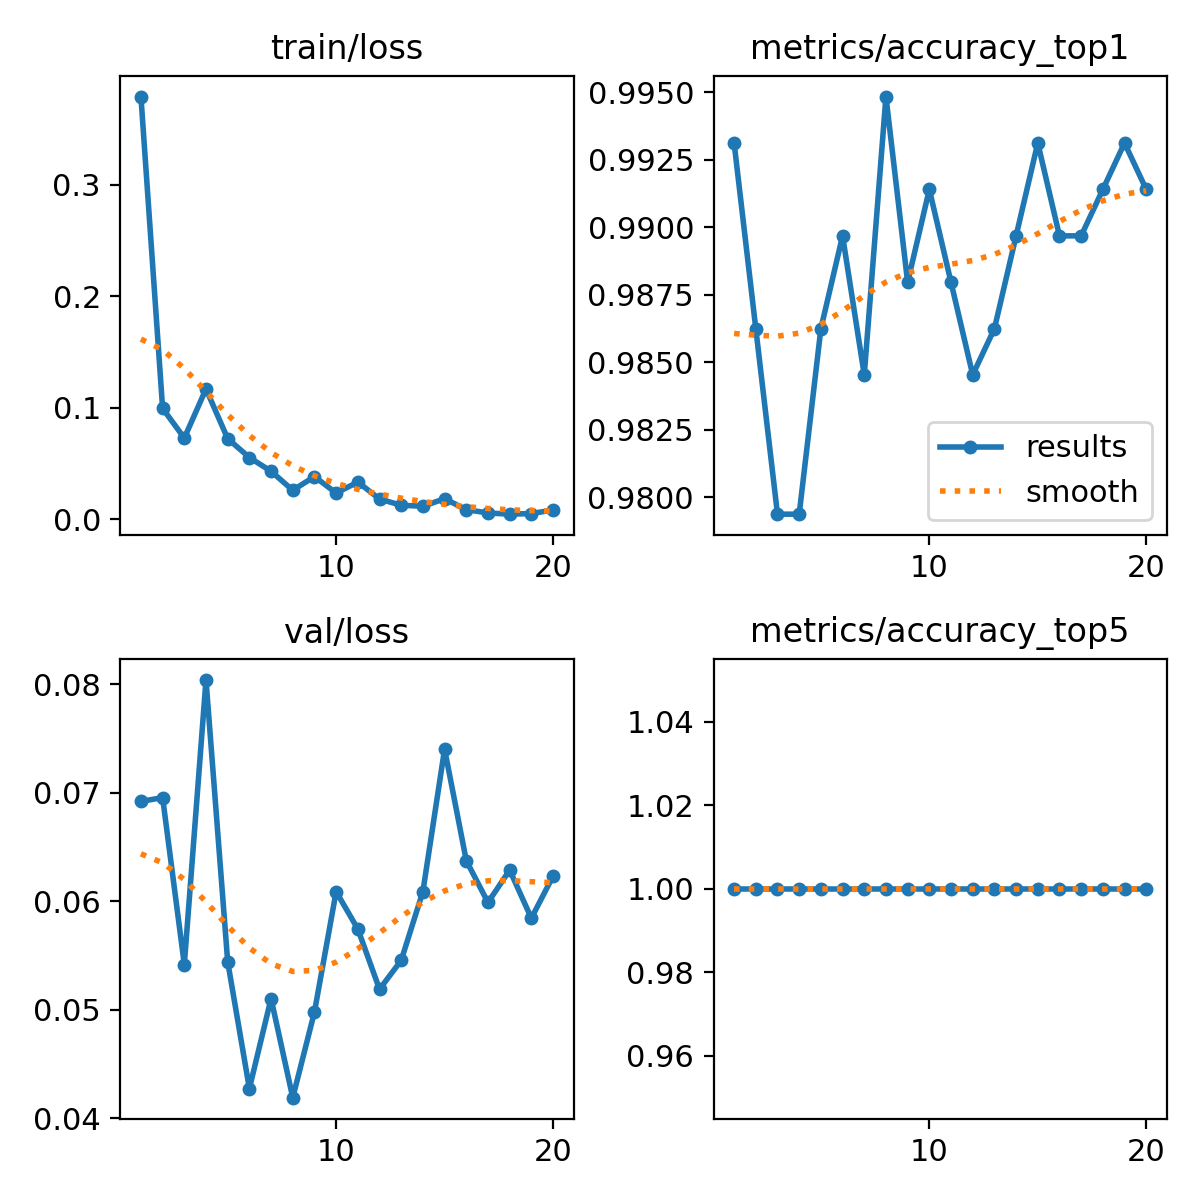

In [7]:

Image("/content/runs/classify/train/results.png", width=600)


image 1/1 /content/140821036684.JPG: 640x640 MultiTires 1.00, side 0.00, front 0.00, OCR 0.00, 4.2ms
Speed: 18.9ms preprocess, 4.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


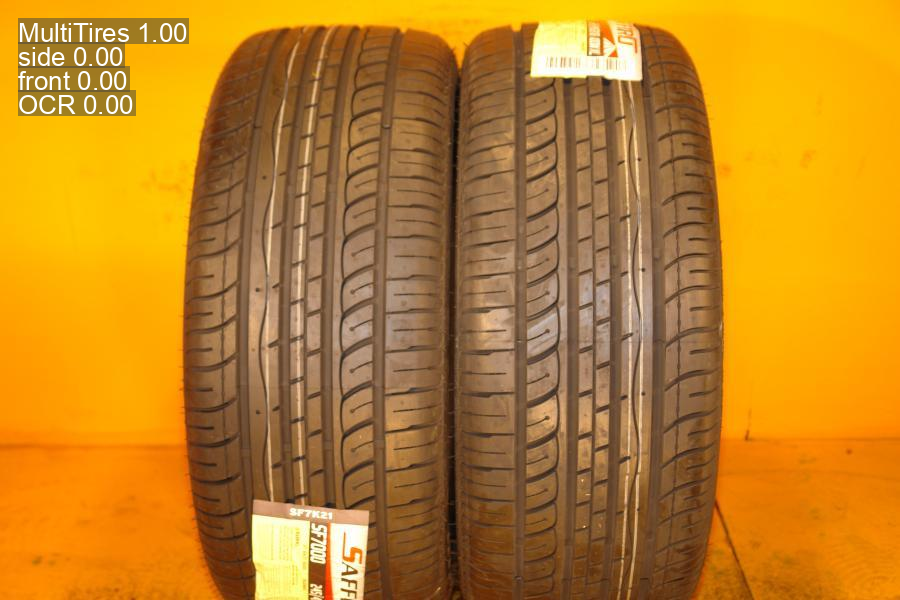

In [14]:
model = YOLO('/content/runs/classify/train/weights/best.pt')

results = model("/content/140821036684.JPG") #, save=True, conf=0.5)
results[0].show()

Trying to classify random 200 images



In [16]:
import shutil
from pathlib import Path
from ultralytics import YOLO

# 1. Load your trained classification model
model = YOLO('runs/classify/train/weights/best.pt')  # Update path if needed

# 2. Define your folders
input_folder = Path("/content/random200")  # Where your unlabelled images are
output_folder = Path("/content/sorted_tires") # Where you want them to go

# 3. Loop through every image in the random folder
for img_path in input_folder.glob("*.*"):  # Grabs all files
    if img_path.suffix.lower() not in ['.jpg', '.jpeg', '.png']:
        continue

    # Run the model silently to save terminal spam
    results = model.predict(source=str(img_path), verbose=False)

    # Extract the highest confidence class name
    predicted_class = results[0].names[results[0].probs.top1]

    # Create a new folder for this class if it doesn't exist yet
    class_dir = output_folder / predicted_class
    class_dir.mkdir(parents=True, exist_ok=True)

    # Copy the image into its new class folder
    shutil.copy(img_path, class_dir / img_path.name)

print("Sorting complete. Check the 'sorted_tires' folder.")

Sorting complete. Check the 'sorted_tires' folder.


In [19]:
import shutil
from google.colab import files

# Zip the sorted_tires folder
shutil.make_archive('/content/train', 'zip', '/content/runs/classify/train')

# Download the zipped folder
files.download('/content/train.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>